### Balanceo ###

In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import TomekLinks
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.under_sampling import EditedNearestNeighbours

# Equipo

- Miguel Malagón
- Duvan Castro
- Hernán Cavadias
- Santiago Buitrago

In [6]:
bank = pd.read_csv('bank-full (1).csv', sep=';')

In [7]:
bank.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [8]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [9]:
bank.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [10]:
bank.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
bank = bank[bank['education'] != 'unknown']

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

colunas = ["default", "housing", "loan", "y", "education", "marital", "poutcome", 
           "contact"]

df_col=list(colunas)

for i in range(len(df_col)):
    bank[df_col[i]] = le.fit_transform(bank[df_col[i]])

In [13]:
bank.head()

age           job  marital  education  default  balance  housing  loan  \
0   58    management        1          2        0     2143        1     0   
1   44    technician        2          1        0       29        1     0   
2   33  entrepreneur        1          1        0        2        1     1   
5   35    management        1          2        0      231        1     0   
6   28    management        2          2        0      447        1     1   

   contact  day month  duration  campaign  pdays  previous  poutcome  y  
0        2    5   may       261         1     -1         0         3  0  
1        2    5   may       151         1     -1         0         3  0  
2        2    5   may        76         1     -1         0         3  0  
5        2    5   may       139         1     -1         0         3  0  
6        2    5   may       217         1     -1         0         3  0

In [14]:
bank.month = pd.to_datetime(bank.month).dt.month

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 1-05-01 00:00:00 present at position 0

In [15]:
bank.head()

age           job  marital  education  default  balance  housing  loan  \
0   58    management        1          2        0     2143        1     0   
1   44    technician        2          1        0       29        1     0   
2   33  entrepreneur        1          1        0        2        1     1   
5   35    management        1          2        0      231        1     0   
6   28    management        2          2        0      447        1     1   

   contact  day month  duration  campaign  pdays  previous  poutcome  y  
0        2    5   may       261         1     -1         0         3  0  
1        2    5   may       151         1     -1         0         3  0  
2        2    5   may        76         1     -1         0         3  0  
5        2    5   may       139         1     -1         0         3  0  
6        2    5   may       217         1     -1         0         3  0

In [16]:
bank.education.unique()

array([2, 1, 0])

In [17]:
bank = pd.get_dummies(bank)
bank.head().T

0    1   2    5    6
age                  58   44  33   35   28
marital               1    2   1    1    2
education             2    1   1    2    2
default               0    0   0    0    0
balance            2143   29   2  231  447
housing               1    1   1    1    1
loan                  0    0   1    0    1
contact               2    2   2    2    2
day                   5    5   5    5    5
duration            261  151  76  139  217
campaign              1    1   1    1    1
pdays                -1   -1  -1   -1   -1
previous              0    0   0    0    0
poutcome              3    3   3    3    3
y                     0    0   0    0    0
job_admin.            0    0   0    0    0
job_blue-collar       0    0   0    0    0
job_entrepreneur      0    0   1    0    0
job_housemaid         0    0   0    0    0
job_management        1    0   0    1    1
job_retired           0    0   0    0    0
job_self-employed     0    0   0    0    0
job_services          0    0   0    0    0
job_student           0    0   0    0    0
job_technician        0    1   0    0    0
job_unemployed        0    0   0    0    0
job_unknown           0    0   0    0    0
month_apr             0    0   0    0    0
month_aug             0    0   0    0    0
month_dec             0    0   0    0    0
month_feb             0    0   0    0    0
month_jan             0    0   0    0    0
month_jul             0    0   0    0    0
month_jun             0    0   0    0    0
month_mar             0    0   0    0    0
month_may             1    1   1    1    1
month_nov             0    0   0    0    0
month_oct             0    0   0    0    0
month_sep             0    0   0    0    0

<AxesSubplot: xlabel='y', ylabel='count'>

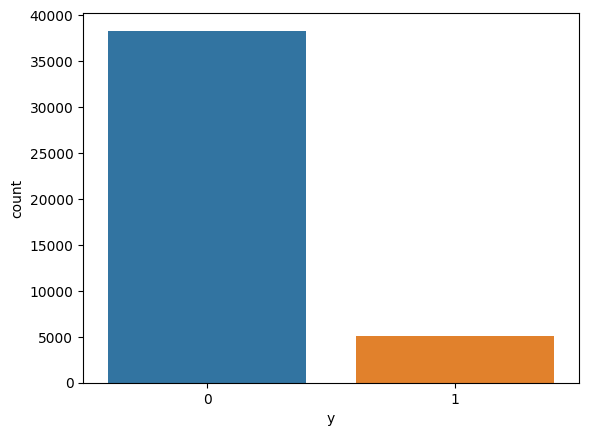

In [18]:
sns.countplot(x = 'y', data = bank,
             order = bank['y'].value_counts().index)

In [19]:
X = bank.drop("y", axis = 1)
y = bank.y

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\program\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
predito = lr.predict(X_test)

In [22]:
accuracy_score(y_test, predito)

0.8851370052587877

In [23]:
print (classification_report(y_test, predito))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9518
           1       0.59      0.18      0.28      1321

    accuracy                           0.89     10839
   macro avg       0.74      0.58      0.61     10839
weighted avg       0.86      0.89      0.86     10839



## Nearmiss

In [24]:
X = bank.drop("y", axis = 1)
y = bank.y
y

0        0
1        0
2        0
5        0
6        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: y, Length: 43354, dtype: int32

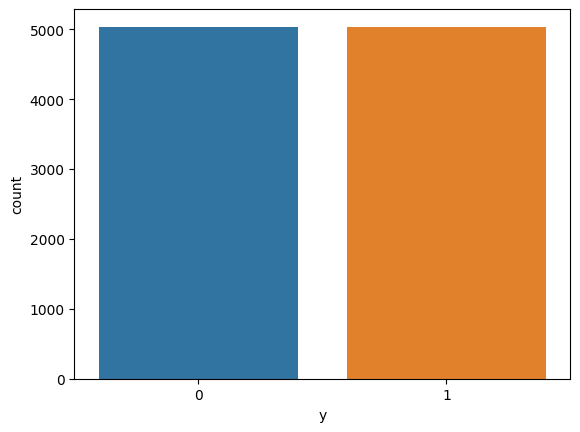

In [25]:
nr = NearMiss()
X, y = nr.fit_resample(X, y)
ax = sns.countplot(x=y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression()

In [27]:
lr.fit(X_train, y_train)

c:\Users\program\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
predito = lr.predict(X_test)

In [29]:
accuracy_score(y_test, predito)

0.8904327113934101

In [30]:
print (classification_report(y_test, predito))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      1277
           1       0.91      0.86      0.89      1242

    accuracy                           0.89      2519
   macro avg       0.89      0.89      0.89      2519
weighted avg       0.89      0.89      0.89      2519



In [31]:
from sklearn import metrics
import matplotlib.pyplot as plt
disp = metrics.plot_confusion_matrix(lr,X_test,y_test)
disp.figure_.suptitle('Confusion Matrix')
print('Confusion Matrix')
plt.show()

AttributeError: module 'sklearn.metrics' has no attribute 'plot_confusion_matrix'

### Aplicando SMOTE ###

In [32]:
X = bank.drop("y", axis = 1)
y = bank.y

In [33]:
smt = SMOTE()
X, y = smt.fit_resample(X, y)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\program\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [35]:
resultado = lr.predict(X_test)
resultado

array([1, 0, 1, ..., 1, 1, 1])

In [36]:
accuracy_score(y_test, resultado)

0.8663291403517929

In [37]:
print (classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      9592
           1       0.87      0.87      0.87      9567

    accuracy                           0.87     19159
   macro avg       0.87      0.87      0.87     19159
weighted avg       0.87      0.87      0.87     19159



### *ROSE* ###

In [ ]:
X = bank.drop("y", axis = 1)
y = bank.y

In [ ]:
ros = RandomOverSampler()
X, y = ros.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\program\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
resultado = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, resultado)

0.8006158985333264

In [ ]:
print (classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      9545
           1       0.81      0.79      0.80      9614

    accuracy                           0.80     19159
   macro avg       0.80      0.80      0.80     19159
weighted avg       0.80      0.80      0.80     19159



### UnderSampling ###

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

X = bank.drop("y", axis=1)
y = bank.y

us = RandomUnderSampler()
X, y = us.fit_resample(X,y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\program\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
resultado = lr.predict(X_test)

In [ ]:
accuracy_score(y_test, resultado)

0.7931718936085749

In [ ]:
print (classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1220
           1       0.82      0.77      0.79      1299

    accuracy                           0.79      2519
   macro avg       0.79      0.79      0.79      2519
weighted avg       0.79      0.79      0.79      2519



### *TOMEK* ###

In [ ]:
x = bank.drop("y", axis=1)
y=bank.y

In [ ]:
tomek= TomekLinks()
x,y=tomek.fit_resample(x,y)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
lr=LogisticRegression()
lr.fit(x_train, y_train)

c:\Users\program\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
result = lr.predict(x_test)

In [ ]:
accuracy_score(y_test, result)

0.8901700778322283

In [ ]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9169
           1       0.61      0.22      0.32      1238

    accuracy                           0.89     10407
   macro avg       0.75      0.60      0.63     10407
weighted avg       0.87      0.89      0.87     10407



### *Condensed Nearest Neighbors * ###

In [38]:
x = bank.drop("y", axis=1)
y=bank.y

In [39]:
cnn= TomekLinks()
x,y=cnn.fit_resample(x,y)

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y)
lr=LogisticRegression()
lr.fit(x_train, y_train)

c:\Users\program\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
result = lr.predict(x_test)

In [42]:
accuracy_score(y_test, result)

0.8908427020274815

In [43]:
print(classification_report(y_test,result))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94      9122
           1       0.66      0.24      0.35      1285

    accuracy                           0.89     10407
   macro avg       0.78      0.61      0.65     10407
weighted avg       0.87      0.89      0.87     10407



### *Edited Nearest Neighbors* ###

In [47]:
X = bank.drop("y", axis = 1)
y = bank.y
enn = EditedNearestNeighbours()
X, y = enn.fit_resample(X, y)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression()
lr.fit(X_train, y_train)

c:\Users\program\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [49]:
resultado = lr.predict(X_test)

In [50]:
accuracy_score(y_test, resultado)

0.9076549210206561

In [51]:
print (classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      7824
           1       0.75      0.48      0.58      1229

    accuracy                           0.91      9053
   macro avg       0.84      0.73      0.77      9053
weighted avg       0.90      0.91      0.90      9053



$$\mbox{ADASYN: Adaptive Synthetic Sampling}$$

Continuando con el análisis de técnicas de balanceo de una muestra vamos a explicar y realizar un ejemplo aplicativo utilizando la técnica **ADASYN**.

El algoritmo de balanceo ADASYN se utiliza cuando tengo problemas de desequilibrio de clases en conjuntos de datos. Es decir, si quisiera investigar sobre los pacientes que padecen cierta enfermedad terminal, al tomar una muestra de la población siendo esta aleatoria y representativa, noto que el total de pacientes sin la enfermedad es significativamente mayor que el total de pacientes que la padecen, 560 y 40, respectivamente de una muestra de 600 pacientes. A lo que se podría esperar es que la clase minoritaria al momento de realizar el modelo no tenga una relevancia en el mismo, por lo que hay a través de una técnica de balanceo de muestra debo corregir ese problema.

ADASYN utiliza una distribución ponderada para diferentes clases minoritarias, (pacientes con la enfermedad), que son más difíciles de relacionar, haciendo muestra sintéticas para cada dato minoritario a través de la técnica de k-neighbors, a tal punto de generar nuevos datos de acuerdo con características similares entre las observaciones. Cade resaltar que la principal diferencia entre la técnica SMOTE es la manera como se generan las muestras sintéticas, SMOTE, lo hace a través de una interpolación fija, mientras que ADASYN se centra en las clases difíciles para identificar y genera las muestras en ese lugar.

**Pasos para realizar el algoritmo ADASYN**

**PASO 1: Calcular la proporción de datos minoritarios a mayoritarios**

$$d = \dfrac{m_{s}}{m_{l}}$$
$$\text{m_s: Clase minoritaria ; m_l: Clase mayoritaria}$$

En la investigación a realizar usted debe establecer un umbral adecuado para su modelo, si d es menor a dicho umbral, debe aplicar el algoritmo.

**PASO 2: Calcular el número total de datos de minorías sintéticas a generar**

$$G = (m_{l}-m_{s})\beta$$

$\beta$ Es la proporción de datos minoritarios deseados después de aplicar el algoritmo, donde $\beta = 1$ significa una muestra perfectamente equilibrada.

**PASO 3: Definir el valor $r_{i}$**

- Definir el parámetro de K-eighbors (K)

$$r_{i} = \dfrac{\# mayoria}{K}$$

**PASO 4: Normalize $r_{i}$:**

Lo que se busca es que los valores de $r_{i}$ sean iguales a 1.

$$\hat{r}_{i} = \dfrac{r_{i}}{\sum{r_{i}}}$$

$$\text{Donde:  } \sum{r_{i}}=1$$

Este paso se hace para faciliar el paso 5

**PASO 5: Cantidad de muestras sintéticas a generar por vecindario**

En este paso el algoritmo de manera adaptativa a generar la muestra correspondiente en aquellos vecindarios donde los datos son más difíciles de entender y agrupar.

In [ ]:
from imblearn.over_sampling import ADASYN

In [ ]:
Xa = bank.drop("y", axis = 1)
ya = bank.y
Xa, ya = ADASYN().fit_resample(Xa, ya)
ax = sns.countplot(x=ya)
# ver en Balance_Tarea2.ipynb